# SVM with RBF kernel

Nipun Batra  
2023-04-25

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/svm-primal-dual.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn import svm
from sklearn.datasets import make_blobs, make_classification

# Generate some random data for demonstration
X, y = make_blobs(n_samples=20, centers=2, random_state=6)

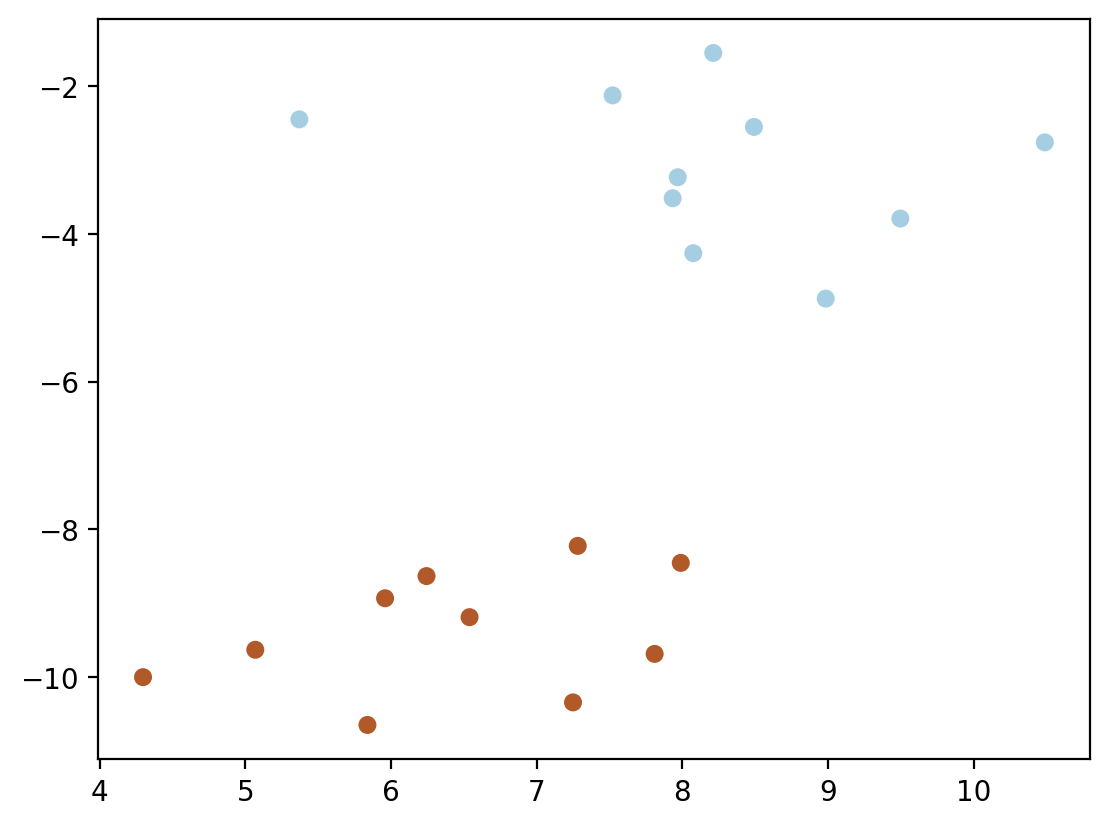

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

In [5]:
# Create an SVM model with an RBF kernel
model = svm.SVC(kernel='linear', C = 1e6)

# Fit the model to the data
model.fit(X, y)

# Access the alpha coefficients
alphas = np.abs(model.dual_coef_.ravel())  # Absolute values of dual coefficients
print(alphas, model.dual_coef_)

[0.14522303 0.11368673 0.0315363 ] [[-0.14522303  0.11368673  0.0315363 ]]

In [6]:
model.support_vectors_ 

array([[ 8.98426675, -4.87449712],
       [ 7.98907212, -8.45336239],
       [ 7.28183008, -8.2229685 ]])

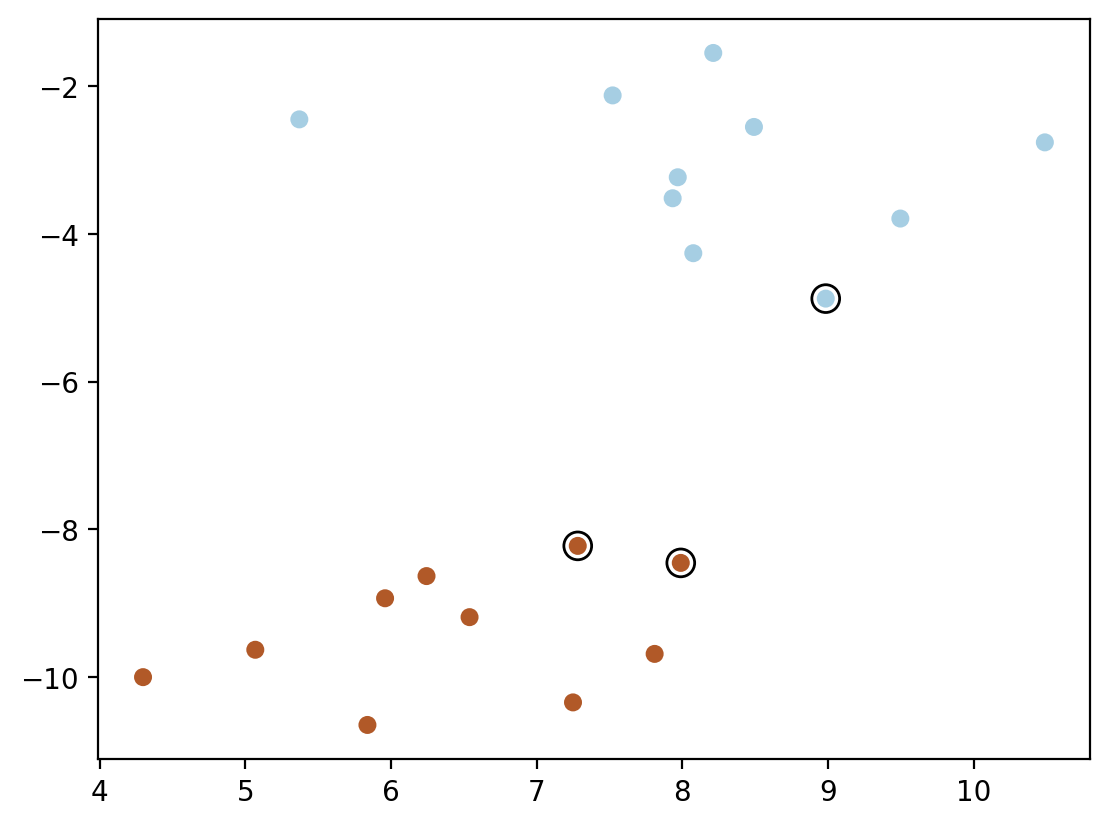

In [7]:
# Plot the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

In [55]:
model.support_vectors_.shape, model.support_vectors_

((3, 2),
 array([[ 8.98426675, -4.87449712],
        [ 7.98907212, -8.45336239],
        [ 7.28183008, -8.2229685 ]]))

In [8]:
model.dual_coef_.shape, model.dual_coef_, y[model.support_]

((1, 3), array([[-0.14522303,  0.11368673,  0.0315363 ]]), array([0, 1, 1]))

In [9]:
ys_minus1_and_plus1 = np.where(y[model.support_] == 0, -1, 1)
ys_minus1_and_plus1

array([-1,  1,  1])

In [10]:
w = np.dot(alphas * ys_minus1_and_plus1, model.support_vectors_)
print("w found using dual coefficients using our calculation:", w)
print("w found using model.coef_:", model.coef_)

w found using dual coefficients using our calculation: [-0.16682897 -0.51246787]
w found using model.coef_: [[-0.16682897 -0.51246787]]

In [11]:
# intercept

nsv = model.support_vectors_.shape[0]
b_sum = 0.0
for i in range(nsv):
    b_sum += ys_minus1_and_plus1[i] - np.dot(w, model.support_vectors_[i])

b = b_sum / nsv

b_sklearn = model.intercept_

print("b found using dual coefficients using our calculation:", b)
print("b found using model.intercept_:", b_sklearn)

b found using dual coefficients using our calculation: -1.9992140529976397
b found using model.intercept_: [-1.99921422]

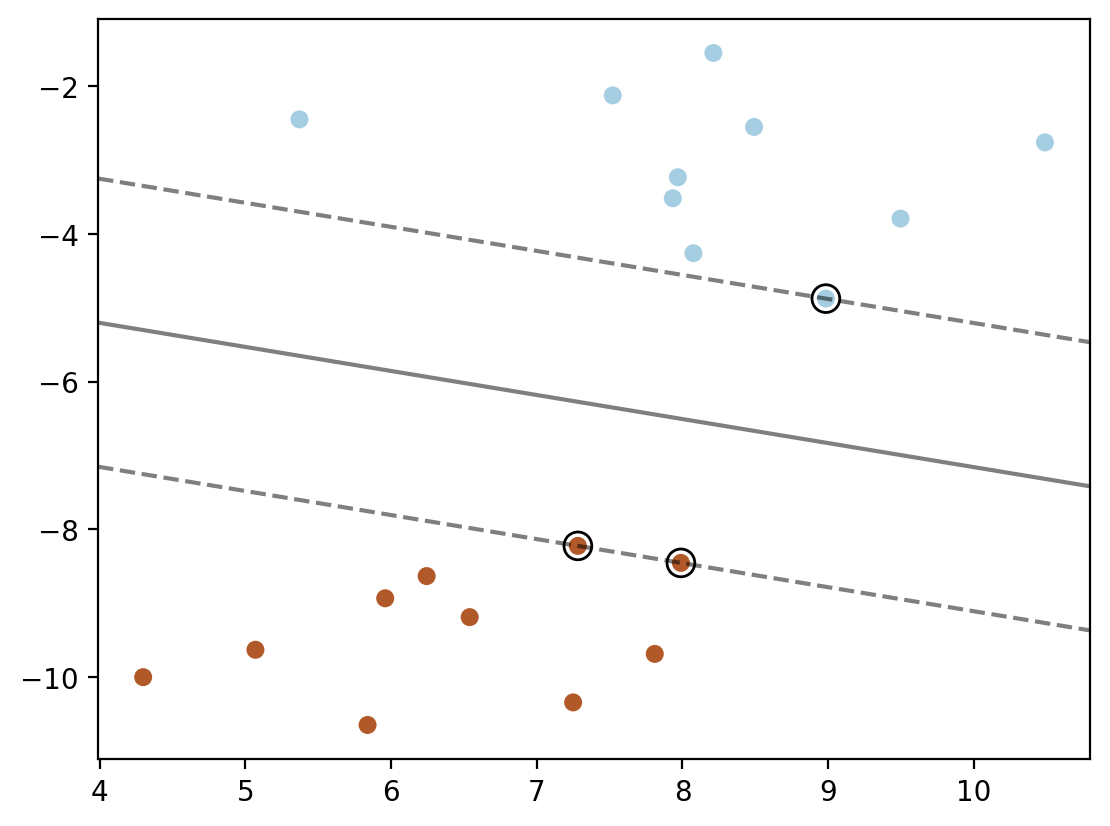

In [60]:
### Method 1: Contour plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = np.dot(xy, w) + b

Z = Z.reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

plt.show()


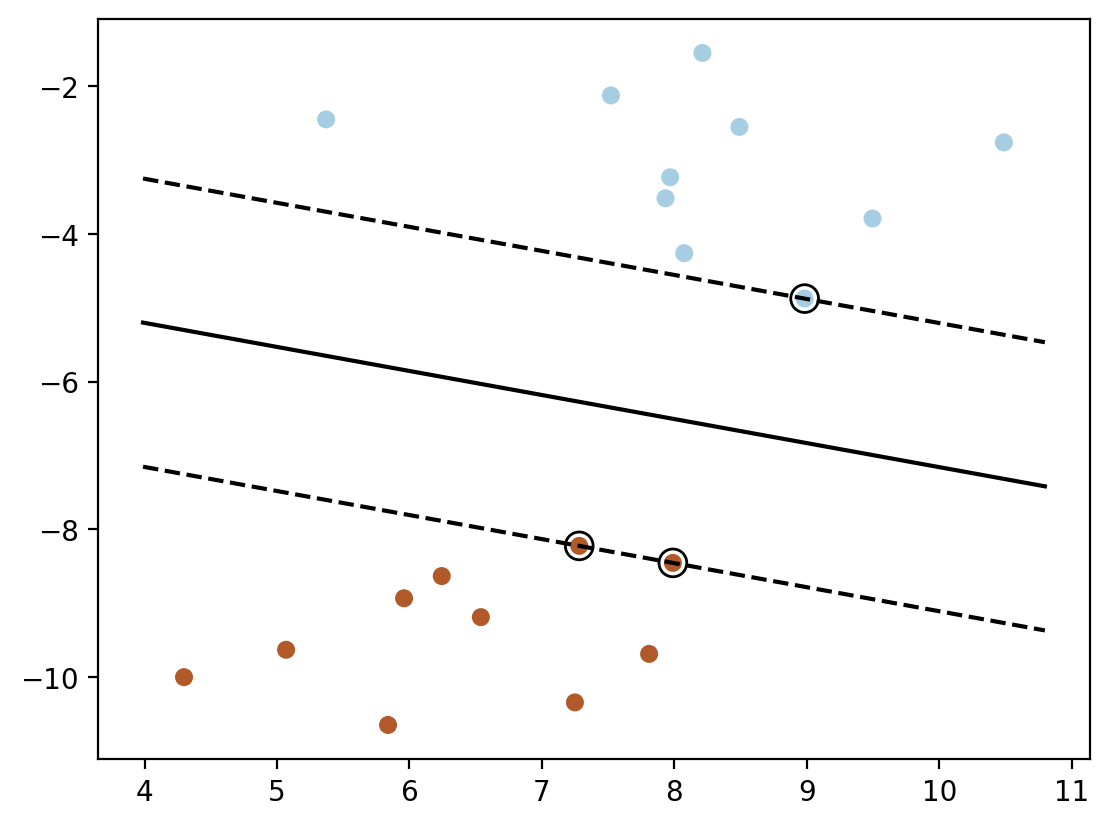

In [12]:
### Method 2: plotting the decision function directly using wx + b = 0 and wx + b = 1 and wx + b = -1

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# decision line
# w1x1 + w2x2 + b = 0
# x2 = (-w1x1 - b) / w2
# x2 is y-axis and x1 is x-axis

w = model.coef_[0]
b = model.intercept_[0]

x1 = np.linspace(xlim[0], xlim[1], 30)
x2 = (-w[0] * x1 - b) / w[1]

plt.plot(x1, x2, 'k-')

# Now plot the margins
# w1x1 + w2x2 + b = 1
# x2 = (-w1x1 - b + 1) / w2

x2 = (-w[0] * x1 - b + 1) / w[1]

plt.plot(x1, x2, 'k--')

x2= (-w[0] * x1 - b - 1) / w[1]
plt.plot(x1, x2, 'k--')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

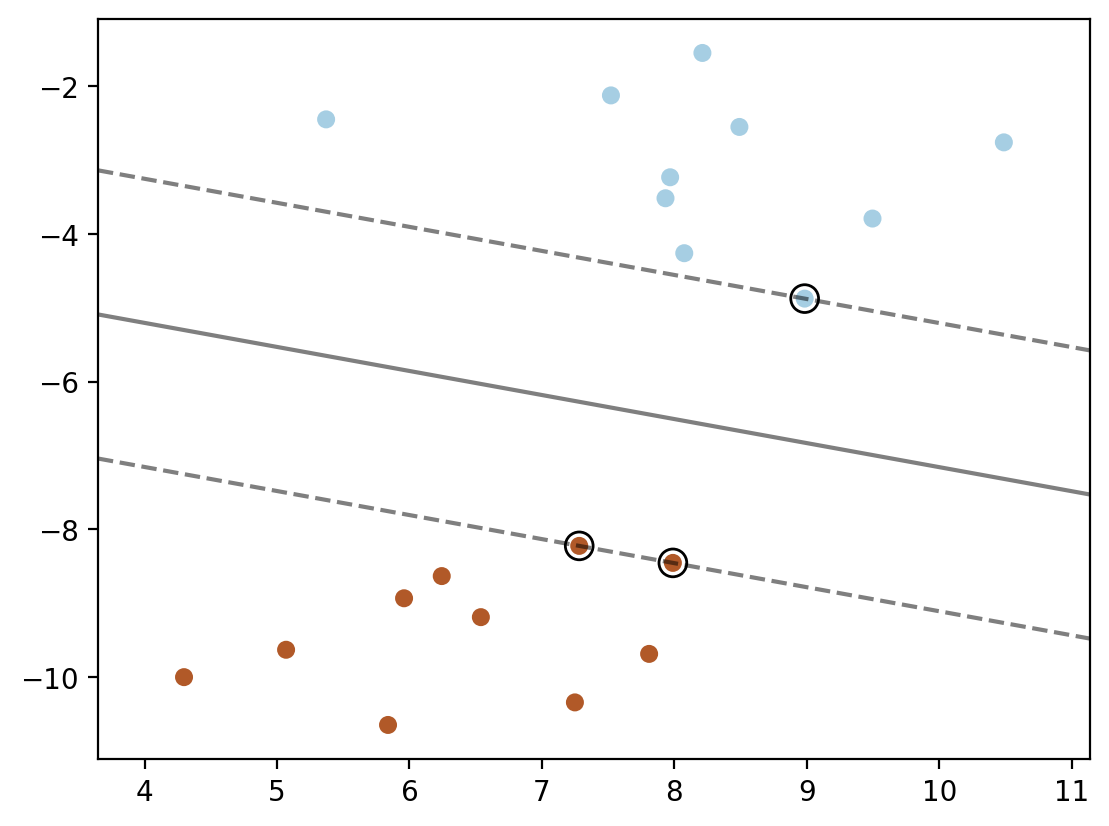

In [13]:
### Method 3: using sklearn's decision_function

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')



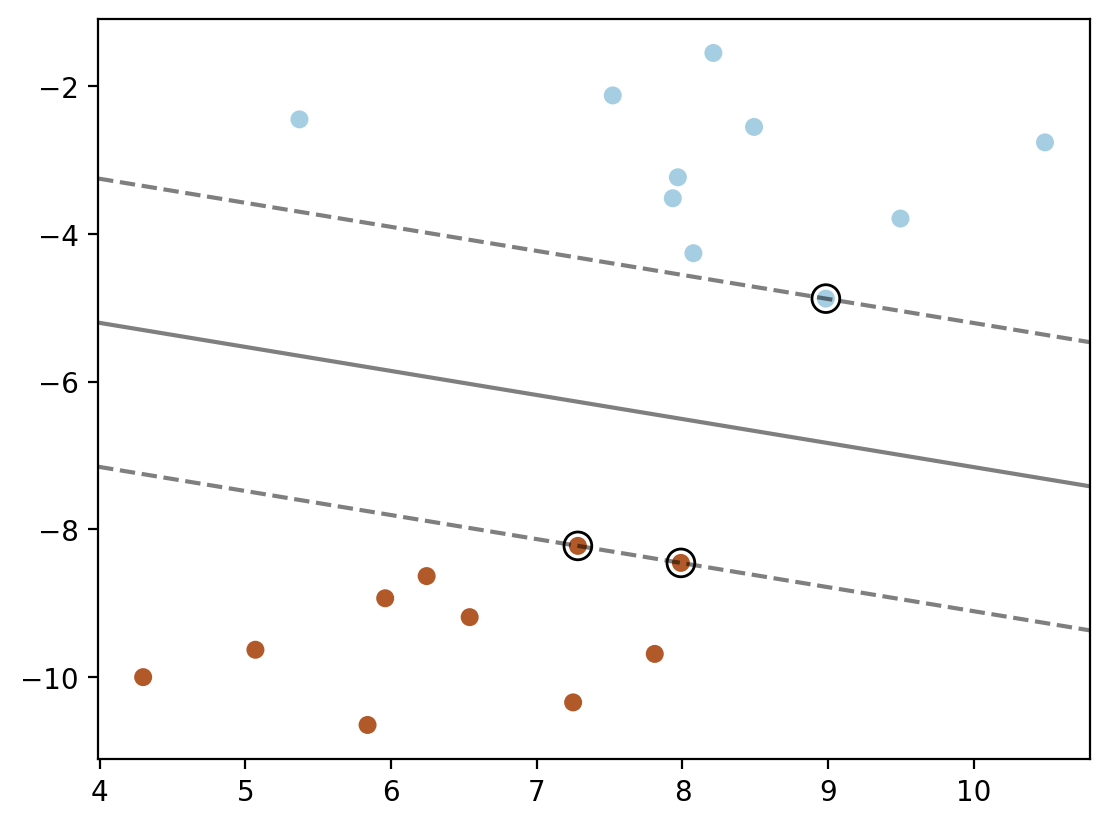

In [84]:
### Method 4: using dot product of phi(xj).phi(x_test) for each support vector point xj

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

def phi_linear(x):
    return x

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

phi_linear_xy = phi_linear(xy)

phi_linear_support_vectors = phi_linear(model.support_vectors_)

alphas = model.dual_coef_

b = model.intercept_[0]

Z = np.ones(len(xy))

for index, phi_x_test in enumerate(phi_linear_xy):
    decision = 0
    for i in range(len(alphas[0])):
        decision += alphas[0][i] * np.dot(phi_linear_support_vectors[i], phi_x_test)
    decision += b
    
    Z[index] = decision
    
plt.contour(XX, YY, Z.reshape(XX.shape), colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')




In [82]:
x_test = xy[0]

phi_linear_support_vectors[0]@x_test*alphas[0][0] + phi_linear_support_vectors[1]@x_test*alphas[0][1] + phi_linear_support_vectors[2]@x_test*alphas[0][2] + b

3.025383870347727

In [83]:
model.decision_function([x_test])

array([3.02538387])

In [86]:
model.decision_function(xy).shape

(900,)

In [88]:
Z.shape

(900,)

In [89]:
np.allclose(Z, model.decision_function(xy))

True

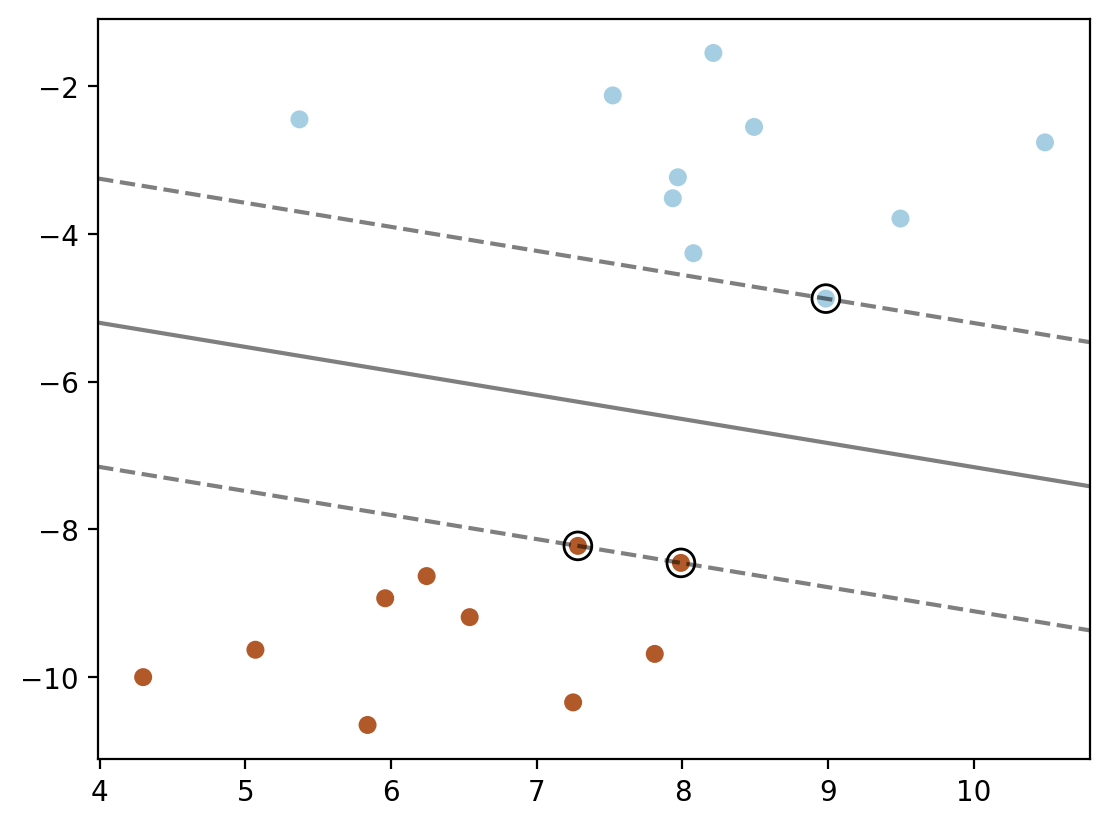

In [91]:
### Method 5: using K(x_sv, x_test) for each support vector point x_sv

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm.Paired)

ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = np.ones(len(xy))

for index, x_test in enumerate(xy):
    decision = 0
    for i in range(len(alphas[0])):
        decision += alphas[0][i] * linear_kernel(model.support_vectors_[i], x_test)
    decision += b
    
    Z[index] = decision
    
plt.contour(XX, YY, Z.reshape(XX.shape), colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
